завдання 1

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
print(os.listdir())

df = pd.read_csv("C:/Users/Вася/OneDrive/Рабочий стол/ОШІ2024/bank-additional-full.csv", sep=";")

display(df.describe())

print("Shape of the dataset:", df.shape)

['bank-additional-full.csv', 'categorical_data.csv', 'categor_data.csv', 'data_categorical.csv', 'data_histogram.csv', 'motorbike_ambulance_calls.csv', 'numerical_data.csv', 'task1_basic_ML&DS_vasia_fatych.ipynb', 'task2_basic_ai_vasia_fatych.ipynb', 'task3_basic_ai_vasia_fatych.ipynb', 'task4_Regression_AI_vasia_fatych.ipynb', 'task5_Classification_vasia.fatych.ipynb', 'titanic.csv']


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Shape of the dataset: (41188, 21)


завдання 2

In [111]:
bank_target = df["y"] = df["y"].map(lambda x: 1 if x == "yes" else 0)
bank_target

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

завдання 3

In [133]:
bank_client = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
for column in bank_client.columns:
    print(f"Attribute: {column}")
    print(f"Number of unique values: {bank_client[column].nunique()}")
    print(f"Percentage distribution:\n{bank_client[column].value_counts(normalize=True) * 100}")
    print("\n")


Attribute: age
Number of unique values: 78
Percentage distribution:
age
31    4.727105
32    4.481888
33    4.450325
36    4.321647
35    4.270661
        ...   
89    0.004856
91    0.004856
94    0.002428
87    0.002428
95    0.002428
Name: proportion, Length: 78, dtype: float64


Attribute: job
Number of unique values: 12
Percentage distribution:
job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: proportion, dtype: float64


Attribute: marital
Number of unique values: 4
Percentage distribution:
marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: proportion, dtype: float64


Attribute: education
Number of unique values: 8
Percentage distribution:
education


завадння 4

Maximum age: 98
Minimum age: 17
Number of NaN values in the Age attribute: 0


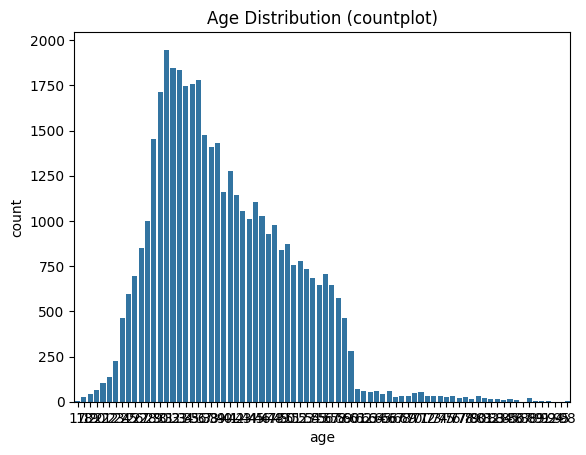

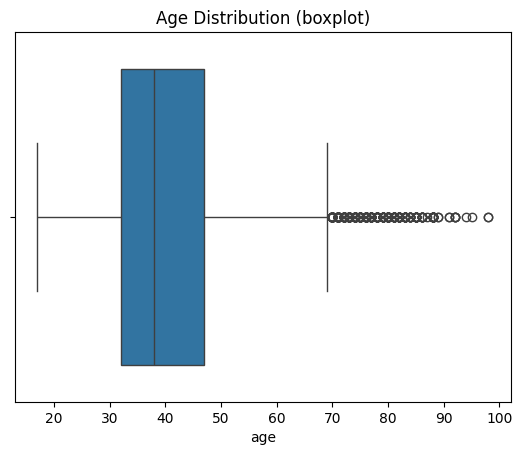

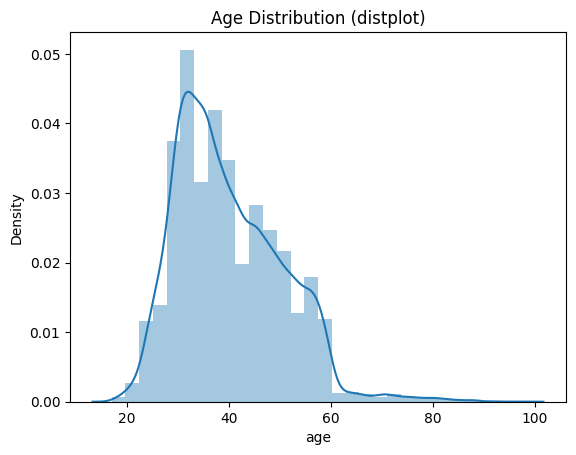

Description of the Age variable:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


In [134]:

max_age = df['age'].max()
min_age = df['age'].min()
print(f"Maximum age: {max_age}")
print(f"Minimum age: {min_age}")
nan_count = df['age'].isnull().sum()
print(f"Number of NaN values in the Age attribute: {nan_count}")

sns.countplot(x='age', data=df)
plt.title('Age Distribution (countplot)')
plt.show()

sns.boxplot(x='age', data=df)
plt.title('Age Distribution (boxplot)')
plt.show()

sns.distplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution (distplot)')
plt.show()

print("Description of the Age variable:")
print(df['age'].describe())


1.Інформація про вік клієнтів - Вік наймолодшого клієнта: 17 років - Вік найстаршого клієнта: 98 років 
2.Відсутність пропущених значень - Серія даних про вік клієнтів не містить жодних порожніх значень (NA).
3.Аналіз вікової структури клієнтів - Більшість клієнтів віком від 25 до 60 років. - Після 60 років кількість клієнтів значно зменшується.

завадання 5

In [114]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame, column: str, low_percentile: int, high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    :param df: DataFrame to detect outliers
    :param column: target column
    :param low_percentile: lower bound between 0 and 100
    :param high_percentile: upper bound between 0 and 100
    :return: DataFrame with detected outliers
    """

    sorted_data = np.sort(df[column])
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print(f"{low_percentile} percentile of the given data: {Q1}")
    print(f"{high_percentile} percentile of the given data: {Q3}")
    print('--------------------------------------------------')

    IQR = Q3 - Q1
    print(f"Interquantile range: {IQR}")
    print('--------------------------------------------------')

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print(f"Lower bound: {low_lim}")
    print(f"Upper bound: {up_lim}")
    print('--------------------------------------------------')

    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print("Outliers in the dataset:")
    display(outliers)
    return outliers

outliers_df = detect_outliers_with_interquantile_range(df, 'age', 25, 75)


25 percentile of the given data: 32.0
75 percentile of the given data: 47.0
--------------------------------------------------
Interquantile range: 15.0
--------------------------------------------------
Lower bound: 9.5
Upper bound: 69.5
--------------------------------------------------
Outliers in the dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27713,70,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,...,3,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,1
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,0
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,0
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,0
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,...,4,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,0
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,1
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,1
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


1.Розподіл за віком (Age): Атрибут "age" містить крайні значення як з верхнього, так і з нижнього боку розподілу,"верхній" і "нижній" хвости вказують на те, що окремі значення віку значно відрізняються від більшості інших даних. Іншими словами, деякі клієнти суттєво старші або молодші за решту клієнтів.
2.Міжквартильний розмах (IQR): IQR значення 27% означає, що 27% усіх значень віку лежать між 25-м і 75-м процентилями розподілу.

In [136]:
завдання 6

SyntaxError: invalid syntax (3759211386.py, line 1)

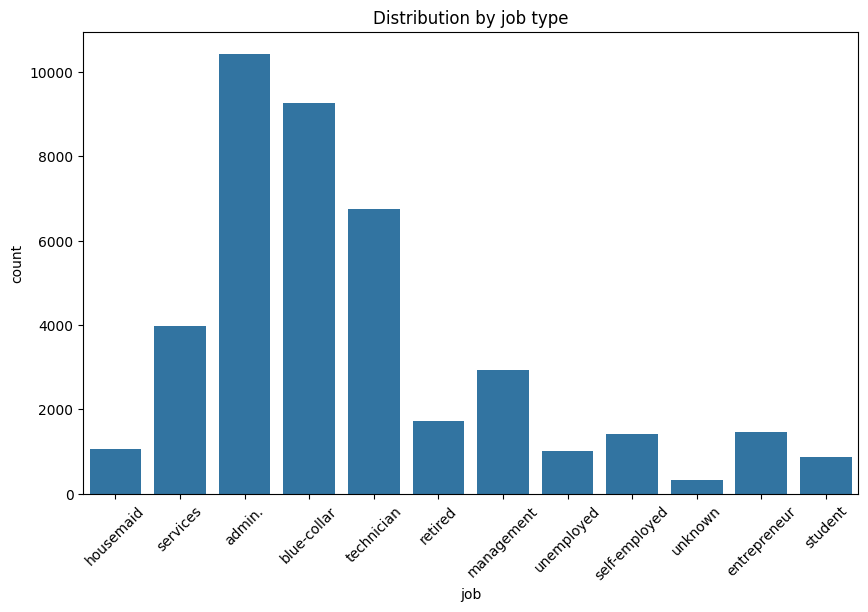

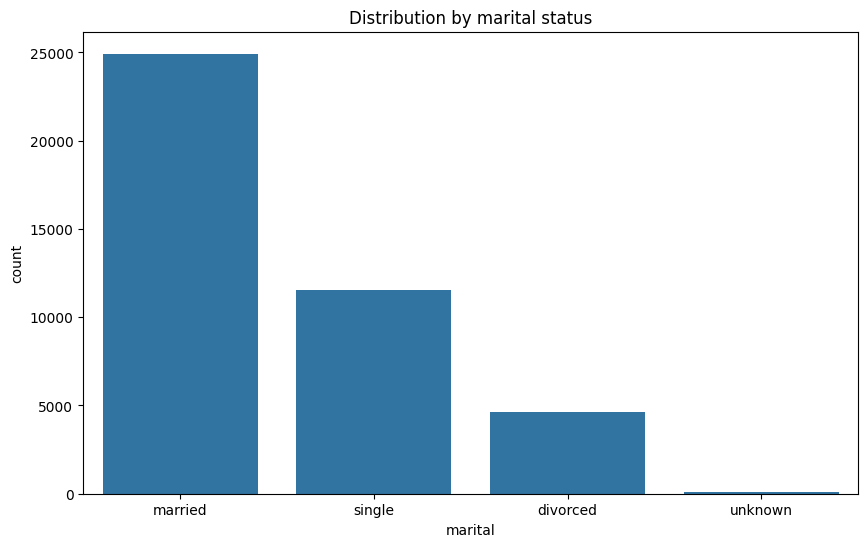

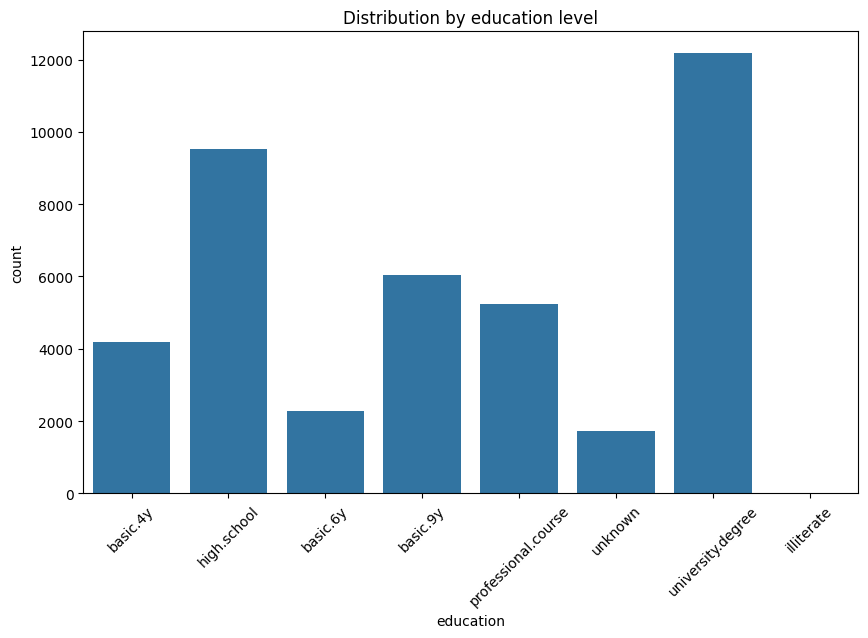

In [137]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df)
plt.title('Distribution by job type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='marital', data=df)
plt.title('Distribution by marital status')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df)
plt.title('Distribution by education level')
plt.xticks(rotation=45)
plt.show()


1.При розгляді розподілу клієнтів банку за типами професій видно, що найменша частка припадає на студентів, а найбільша - на працівників адміністративної сфери. Присутня також значна кількість клієнтів з робітничих професій, а клієнти з технічними спеціальностями становлять меншу частину.

2.З гістограми видно, що найбільша активність користувачів банку спостерігається серед одружених або заручених осіб. Середній рівень використання банківських послуг мають одинокі клієнти. Найнижчий рівень активності виявлено в групі розлучених осіб.

3.Гістограма рівня освіти клієнтів банку показує, що: * Бакалаври та магістри складають найбільшу групу. * Випускники середньої школи становлять дещо меншу частку. Клієнти з освітою в 9 класів або на курсах приблизно однаково поширені. Найменше користувачів послуг банку мають освіту на рівні 4 або 6 класів.


завдання 7

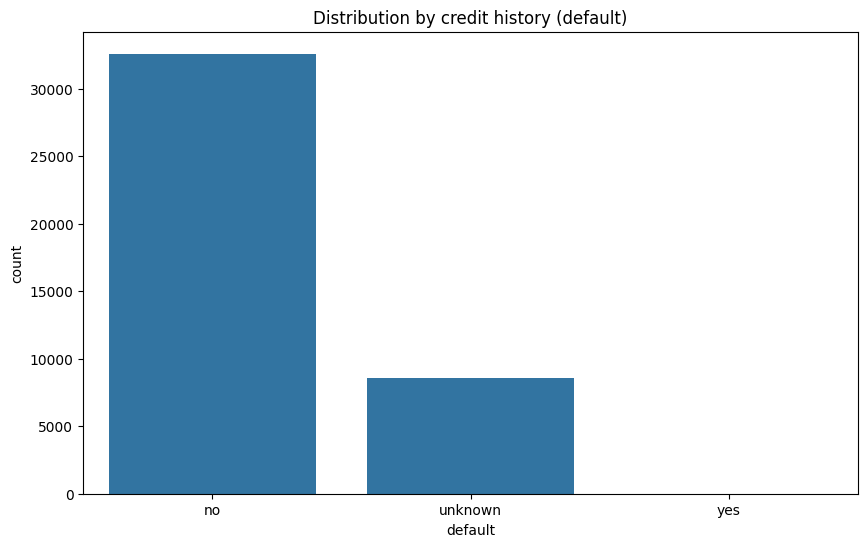

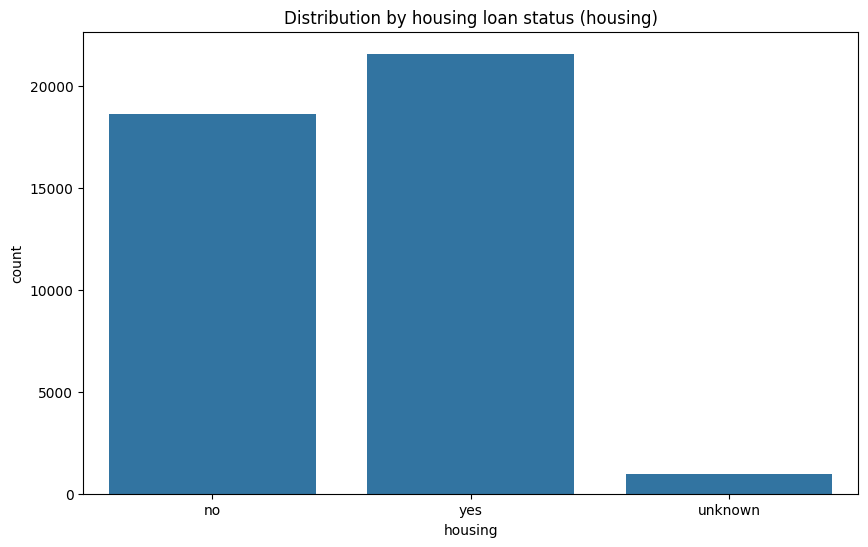

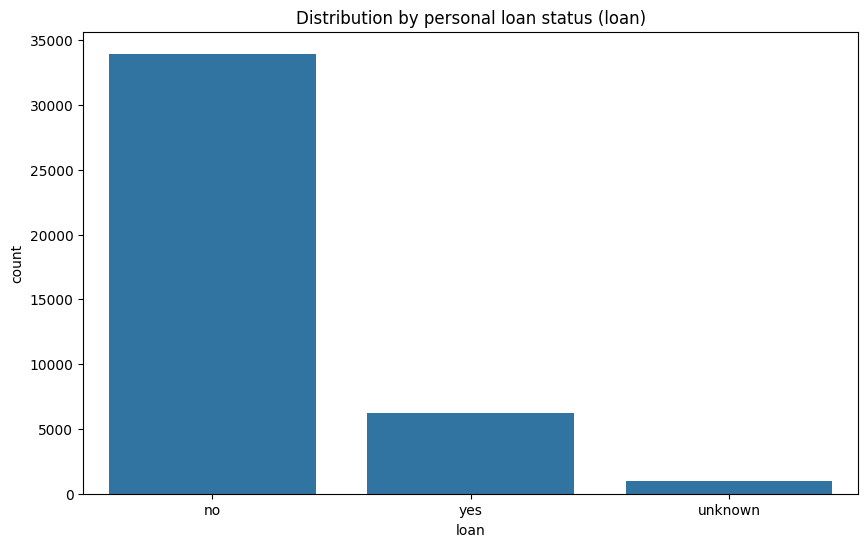

In [138]:
plt.figure(figsize=(10, 6))
sns.countplot(x='default', data=df)
plt.title('Distribution by credit history (default)')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='housing', data=df)
plt.title('Distribution by housing loan status (housing)')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='loan', data=df)
plt.title('Distribution by personal loan status (loan)')
plt.show()



завадння 8

In [79]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    :param df: DataFrame to encode
    :param categorical_cols: specified columns to encode
    :return: DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df.loc[df[col].notnull(), col] = le.fit_transform(not_null)
    return df

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']
bank_client_encoded = encode_categorical_columns(bank_client, categorical_cols)
bank_client_encoded.head()


,job,marital,education,default,housing,loan
0,0,1,1,0,1,0
1,4,2,2,0,1,1
2,3,0,0,1,0,0
3,1,1,2,0,1,0
4,2,0,0,0,0,1


завдання 9

In [80]:
def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding age column using quartile values.
    :param dataframe: DataFrame to encode.
    :param age_col: age column to encode.
    :return: DataFrame with encoded age column.
    """
    if age_col not in dataframe.columns:
        raise KeyError(f"The column '{age_col}' was not found in the DataFrame.")
    dataframe[age_col] = pd.qcut(dataframe[age_col], q=4, labels=False, duplicates='drop') + 1

    return dataframe


example_data = pd.DataFrame({
    'age': [22, 35, 58, 45, 26, 32, 37, 29, 61, 45, 64, 20]
})

encoded_data = encode_age(example_data, 'age')
encoded_data.head()  


,age
0,1
1,2
2,4
3,3
4,1


комент

завадання 10

In [82]:
relationship_columns = ['duration', 'campaign', 'pdays', 'previous']  # Example
bank_relationship_df = df[relationship_columns]

print("Dataframe of client's relationship with the bank:")
print(bank_relationship_df)
print("\n Check for NaN values:")
print(bank_relationship_df.isnull().any())



ДатаФрейм зв'язку клієнтів з банком:
       duration  campaign  pdays  previous
0           261         1    999         0
1           149         1    999         0
2           226         1    999         0
3           151         1    999         0
4           307         1    999         0
...         ...       ...    ...       ...
41183       334         1    999         0
41184       383         1    999         0
41185       189         2    999         0
41186       442         1    999         0
41187       239         3    999         1

[41188 rows x 4 columns]

Перевірка на NaN значення:
duration    False
campaign    False
pdays       False
previous    False
dtype: bool


завадання 11

In [139]:
print("Unique values for 'contact':", df['contact'].unique())
print("Unique values for 'month':", df['month'].unique())
print("Unique values for 'day_of_week':", df['day_of_week'].unique())



Unique values for 'contact': ['telephone' 'cellular']
Unique values for 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values for 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']


завадання 12

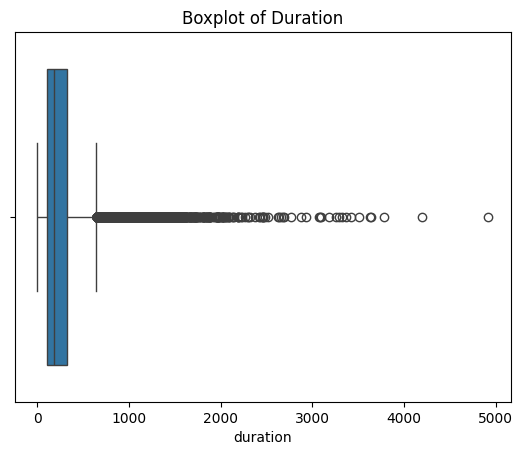

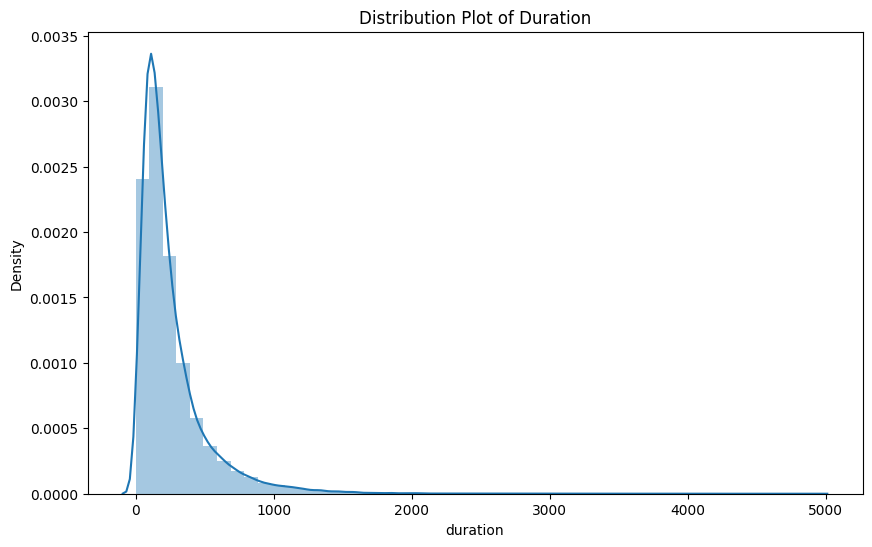

In [140]:

sns.boxplot(x=df['duration'])
plt.title('Boxplot of Duration')
plt.show()

plt.figure(figsize=(10, 6))
sns.distplot(df['duration'], kde=True)
plt.title('Distribution Plot of Duration')
plt.show()




завадння 13

In [141]:

def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder

    :param df: DataFrame to encode
    :param categorical_cols: specified columns to encode
    :return: DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df.loc[df[col].notnull(), col] = le.fit_transform(not_null)
    return df
df = pd.DataFrame({
    'contact': ['cellular', 'telephone', 'cellular', 'telephone'],
    'month': ['may', 'jul', 'aug', 'dec'],
    'day_of_week': ['mon', 'wed', 'fri', 'tue']
})
encoded_df = encode_categorical_columns(df, ['contact', 'month', 'day_of_week'])
encoded_df


,contact,month,day_of_week
0,0,3,1
1,1,2,3
2,0,0,0
3,1,1,2


завадння 14

In [142]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    Function for encoding duration column using quartile values.
    :param dataframe: DataFrame to encode.
    :param duration_col: duration column to encode.
    :return: DataFrame with encoded duration column.
    """
    if duration_col not in dataframe.columns:
        raise KeyError(f"The column '{duration_col}' does not exist in the DataFrame.")
    dataframe[duration_col] = pd.qcut(dataframe[duration_col], q=4, labels=False) + 1

    return dataframe
example_data = pd.DataFrame({
    'duration': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
})
example_data_encoded = encode_duration(example_data, 'duration')
example_data_encoded.head()



,duration
0,1
1,1
2,1
3,1
4,2


завдання 15

In [120]:
df = pd.read_csv("C:/Users/Вася/OneDrive/Рабочий стол/ОШІ2024/bank-additional-full.csv", sep=";")
social_economic_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
bank_socec = df[social_economic_cols]
print(bank_socec)


       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0               1.1          93.994          -36.4      4.857       5191.0
1               1.1          93.994          -36.4      4.857       5191.0
2               1.1          93.994          -36.4      4.857       5191.0
3               1.1          93.994          -36.4      4.857       5191.0
4               1.1          93.994          -36.4      4.857       5191.0
...             ...             ...            ...        ...          ...
41183          -1.1          94.767          -50.8      1.028       4963.6
41184          -1.1          94.767          -50.8      1.028       4963.6
41185          -1.1          94.767          -50.8      1.028       4963.6
41186          -1.1          94.767          -50.8      1.028       4963.6
41187          -1.1          94.767          -50.8      1.028       4963.6

[41188 rows x 5 columns]


завдання 16

In [129]:
df_example = pd.DataFrame({
    'campaign': [1, 2, 3, 4, 1],
    'pdays': [999, 999, 999, 12, 999],
    'previous': [0, 1, 2, 0, 1],
    'poutcome': ['nonexistent', 'failure', 'success', 'nonexistent', 'failure'],    
})
bank_other = df_example[['campaign', 'pdays', 'previous', 'poutcome']]
print(bank_other)


   campaign  pdays  previous     poutcome
0         1    999         0  nonexistent
1         2    999         1      failure
2         3    999         2      success
3         4     12         0  nonexistent
4         1    999         1      failure


заваданян 17

In [131]:

le = LabelEncoder()
df['poutcome_encoded'] = le.fit_transform(df['poutcome'])
print(df[['poutcome', 'poutcome_encoded']])


          poutcome  poutcome_encoded
0      nonexistent                 1
1      nonexistent                 1
2      nonexistent                 1
3      nonexistent                 1
4      nonexistent                 1
...            ...               ...
41183  nonexistent                 1
41184  nonexistent                 1
41185  nonexistent                 1
41186  nonexistent                 1
41187      failure                 0

[41188 rows x 2 columns]


завадання 18

In [132]:

bank_final = pd.concat([bank_client_encoded, bank_socec, bank_other], axis=1)
print(bank_final.head())


  job marital education default housing loan  emp.var.rate  cons.price.idx  \
0   0       1         1       0       1    0           1.1          93.994   
1   4       2         2       0       1    1           1.1          93.994   
2   3       0         0       1       0    0           1.1          93.994   
3   1       1         2       0       1    0           1.1          93.994   
4   2       0         0       0       0    1           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  campaign  pdays  previous  \
0          -36.4      4.857       5191.0       1.0  999.0       0.0   
1          -36.4      4.857       5191.0       2.0  999.0       1.0   
2          -36.4      4.857       5191.0       3.0  999.0       2.0   
3          -36.4      4.857       5191.0       4.0   12.0       0.0   
4          -36.4      4.857       5191.0       1.0  999.0       1.0   

      poutcome  
0  nonexistent  
1      failure  
2      success  
3  nonexistent  
4      failure  


завдання 19

In [170]:
def setup_training_data(features: pd.DataFrame,
                        outcomes: pd.Series,
                        proportion: float,
                        cv_folds: int,
                        seed: int):
    """
    Prepares the dataset for the training phase. Splits the dataset into training and testing sets,
    and prepares a K-Fold cross-validation scheme.
    
    Parameters:
    - features: DataFrame containing the predictor variables.
    - outcomes: Series containing the target outcome.
    - proportion: The proportion of the dataset to include in the test split.
    - cv_folds: The number of folds for cross-validation.
    - seed: The seed of the pseudo-random number generator to use when shuffling the data.
    
    Returns:
    - train_features, test_features, train_outcome, test_outcome, cv_scheme: Training and testing sets,
      and the KFold instance for cross-validation.
    """
    train_features, test_features, train_outcome, test_outcome = train_test_split(features, outcomes, test_size=proportion, random_state=seed)
    cv_scheme = KFold(n_splits=cv_folds, shuffle=True, random_state=seed)
    
    return train_features, test_features, train_outcome, test_outcome, cv_scheme


In [172]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)
  return X_train, X_test



In [173]:
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'target': [0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)
print(confusion_matrix(y_test, logpred))


[[0 1]
 [1 0]]


In [174]:
data1 = {
    'job': [0, 4, 3, 1, 2],
    'marital': [1, 2, 0, 1, 0],
    'education': [1, 2, 0, 2, 0],
    'default': [0, 0, 1, 0, 0],
    'housing': [1, 1, 0, 1, 0],
    'loan': [0, 1, 0, 0, 1],
    'age': [1, 2, 4, 3, 1]
}
df1 = pd.DataFrame(data1)
data2 = {
    'duration': [261, 149, 226, 151, 307],
    'campaign': [1, 1, 1, 1, 1],
    'pdays': [999, 999, 999, 999, 999],
    'previous': [0, 0, 0, 0, 0]
}
df2 = pd.DataFrame(data2)
df = pd.concat([df1, df2], axis=1)
print(df.describe())  
print("\nПеревірка на NaN значення:\n", df.isna().any())



            job  marital  education   default   housing      loan      age  \
count  5.000000  5.00000        5.0  5.000000  5.000000  5.000000  5.00000   
mean   2.000000  0.80000        1.0  0.200000  0.600000  0.400000  2.20000   
std    1.581139  0.83666        1.0  0.447214  0.547723  0.547723  1.30384   
min    0.000000  0.00000        0.0  0.000000  0.000000  0.000000  1.00000   
25%    1.000000  0.00000        0.0  0.000000  0.000000  0.000000  1.00000   
50%    2.000000  1.00000        1.0  0.000000  1.000000  0.000000  2.00000   
75%    3.000000  1.00000        2.0  0.000000  1.000000  1.000000  3.00000   
max    4.000000  2.00000        2.0  1.000000  1.000000  1.000000  4.00000   

         duration  campaign  pdays  previous  
count    5.000000       5.0    5.0       5.0  
mean   218.800000       1.0  999.0       0.0  
std     69.066634       0.0    0.0       0.0  
min    149.000000       1.0  999.0       0.0  
25%    151.000000       1.0  999.0       0.0  
50%    226.0000

1.Логістична регресія: результат точності становить 90%. Ця модель не може надати відповідь з таким високим показником, особливо коли класи не збалансовані.
2.k-NN: використання цієї моделі з оптимальною кількістю сусідів привело до точності 90%. Кількість сусідів визначається за допомогою перехресної перевірки. Такий же висновок можна зробити щодо точності, як і з попередньою моделлю.
3.Метрики оцінки якості: у певних випадках точність може відрізнятися.